# Coronavirus lifestyle impact project outline

I made this as kind of a mock up for what we could build off of - e.g. incorporating the user input and generating resulting output and just to check the flow will all work as expected. Hopefully we can take this and use it to transform some of our ideas and to play around with visualizations and such! 

To use it just put in a state name (full name) and then 2 Google search keywords and the rest should be done for you!

In [56]:
import pandas as pd     
import us
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

In [57]:
state = input("What state would you like information for? ") 

What state would you like information for? Ohio


In [58]:
keyword_1 = input("First keyword to search for: ")

First keyword to search for: masks


In [59]:
keyword_2 = input("Second keyword to search for: ")

Second keyword to search for: puppy breeder


In [60]:
keywords = [keyword_1, keyword_2]
state_abbr = us.states.lookup(state).abbr
state_abbr

'OH'

In [61]:
state_data = pd.read_csv("https://raw.githubusercontent.com/microsoft/Bing-COVID-19-Data/master/data/Bing-COVID19-Data.csv")
state_data = state_data[(state_data.AdminRegion1 == state) & (state_data.AdminRegion2.isnull())]
state_data

,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2
155792,85449,01/21/2020,0,NaN,NaN,NaN,NaN,NaN,40.41305,-82.71122,US,USA,United States,Ohio,NaN
155793,85450,01/24/2020,0,0.0,NaN,NaN,NaN,NaN,40.41305,-82.71122,US,USA,United States,Ohio,NaN
155794,85451,01/25/2020,0,0.0,NaN,NaN,NaN,NaN,40.41305,-82.71122,US,USA,United States,Ohio,NaN
155795,85452,01/26/2020,0,0.0,NaN,NaN,NaN,NaN,40.41305,-82.71122,US,USA,United States,Ohio,NaN
155796,85453,01/30/2020,0,0.0,NaN,NaN,NaN,NaN,40.41305,-82.71122,US,USA,United States,Ohio,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155881,16971598,05/16/2020,27474,520.0,1610.0,29.0,NaN,NaN,40.41305,-82.71122,US,USA,United States,Ohio,NaN
155882,16971600,05/17/2020,27923,449.0,1625.0,15.0,NaN,NaN,40.41305,-82.71122,US,USA,United States,Ohio,NaN
155883,16971602,05/18/2020,28454,531.0,1657.0,32.0,NaN,NaN,40.41305,-82.71122,US,USA,United States,Ohio,NaN
155884,16971603,05/19/2020,28952,498.0,1720.0,63.0,NaN,NaN,40.41305,-82.71122,US,USA,United States,Ohio,NaN


In [84]:
user_timeframe = "2019-05-11 2020-05-11"
area_code = "en-US-" + state_abbr
pytrend = TrendReq(hl=area_code, tz=480)
pytrend.build_payload(kw_list=keywords, timeframe=user_timeframe)
df = pytrend.interest_over_time()
df

,masks,puppy breeder,isPartial
date,,,
2019-05-12,7,0,False
2019-05-19,6,0,False
2019-05-26,6,0,False
2019-06-02,6,0,False
2019-06-09,6,0,False
2019-06-16,6,0,False
2019-06-23,6,0,False
2019-06-30,5,0,False
2019-07-07,6,0,False


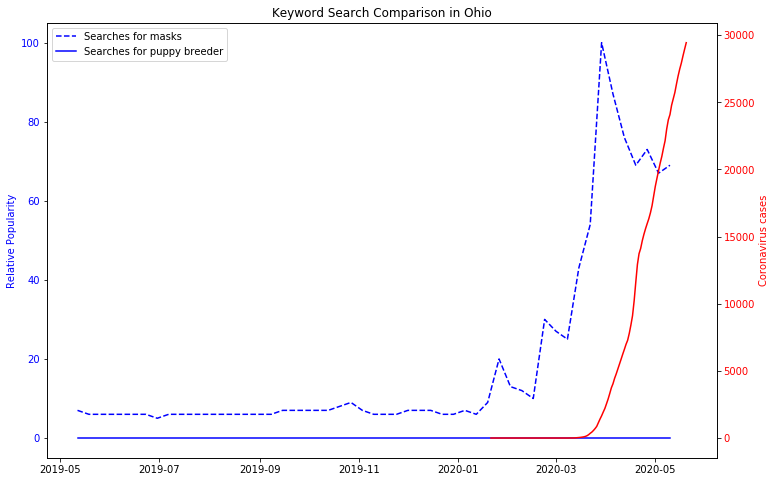

In [63]:
fig, ax1 = plt.subplots(figsize=(12,8))
plt.title("Keyword Search Comparison in " + state)
ax1.set_ylabel("Relative Popularity", color="blue")
ax1.plot(df.index.values, df[keyword_1], "--", c="blue", label="Searches for " + keyword_1)
ax1.plot(df.index.values, df[keyword_2], "-", c="blue", label="Searches for " + keyword_2)
ax1.tick_params(axis='y', labelcolor="blue")
ax2 = ax1.twinx()
ax2.set_ylabel("Coronavirus cases", color="red")
ax2.plot(pd.to_datetime(state_data.Updated), state_data.Confirmed, c="red")
ax2.tick_params(axis='y', labelcolor="red")
ax1.legend()
plt.show()

In [81]:
def data_processor(dataframe):
    covid = dataframe[0]
    trend = dataframe[1]
    
    covid = covid.drop(columns=['ID', 'Latitude', 'Longitude', 'ISO2', 'ISO3', 'AdminRegion2'])
    covid = covid.rename(columns={'Updated': 'Date', 'Country_Region': 'Country', 'AdminRegion1': 'State'})
    covid['Date'] = pd.to_datetime(covid['Date'])
    covid = covid.reset_index(drop=True)
    covid = covid.set_index(['Date'], drop=True)
    
    trend = trend.drop(columns='isPartial')
    
    agg = covid.join(trend, how='outer')
    
    return [covid, trend, agg]

clean_data = data_processor([state_data, df])
clean_data[2]

,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Country,State,masks,puppy breeder
2019-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.0
2019-05-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.0
2019-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.0
2019-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.0
2019-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-05-16,27474.0,520.0,1610.0,29.0,NaN,NaN,United States,Ohio,NaN,NaN
2020-05-17,27923.0,449.0,1625.0,15.0,NaN,NaN,United States,Ohio,NaN,NaN
2020-05-18,28454.0,531.0,1657.0,32.0,NaN,NaN,United States,Ohio,NaN,NaN
2020-05-19,28952.0,498.0,1720.0,63.0,NaN,NaN,United States,Ohio,NaN,NaN


In [88]:
agg.to_csv('agg_data.csv')

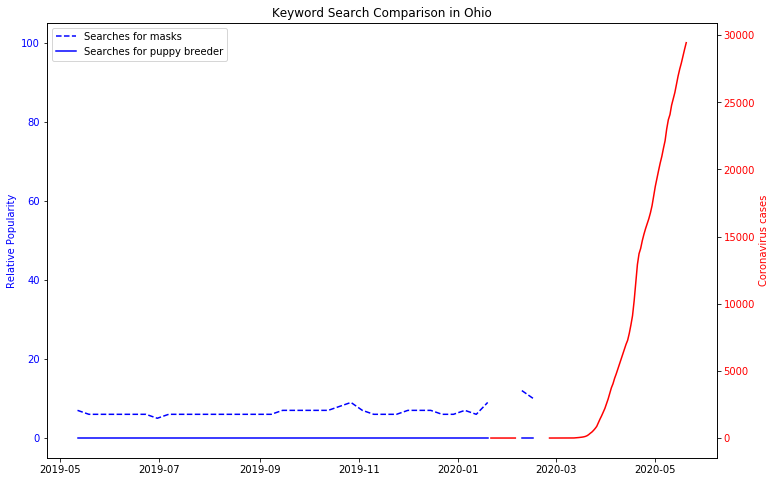

In [86]:
fig, ax3 = plt.subplots(figsize=(12,8))
plt.title("Keyword Search Comparison in " + state)
ax3.set_ylabel("Relative Popularity", color="blue")
ax3.plot(agg.index.values, agg[keyword_1], "--", c="blue", label="Searches for " + keyword_1)
ax3.plot(agg.index.values, agg[keyword_2], "-", c="blue", label="Searches for " + keyword_2)
ax3.tick_params(axis='y', labelcolor="blue")
ax4 = ax3.twinx()
ax4.set_ylabel("Coronavirus cases", color="red")
ax4.plot(agg.index.values, agg.Confirmed, c="red")
ax4.tick_params(axis='y', labelcolor="red")
ax3.legend()
plt.show()